In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture

In [2]:
train_features = pd.read_csv('../data/train_features.csv')
train_targets = pd.read_csv('../data/train_targets_scored.csv')
train_targets_ns = pd.read_csv('../data/train_targets_nonscored.csv')
test_features = pd.read_csv('../data/test_features.csv')

In [5]:
train_features.iloc[:, 1:]

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,trt_cp,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,trt_cp,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,ctl_vehicle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,trt_cp,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [29]:
target = 'nfkb_inhibitor'

In [36]:
mask = (train_targets[target] == 1) & (train_features['cp_type'] == 'trt_cp')
treat_sample = train_features[mask]
train_sample = train_features[~mask]

In [38]:
def featurize(df):
    dose_enc = dict(D1=0, D2=1)
    time_enc = {24:-1, 48:0, 72:1}
    return df.replace(dict(cp_time=time_enc, cp_dose=dose_enc)).drop(['sig_id', 'cp_type'], axis=1)

In [39]:
x_treat = featurize(treat_sample)
x_train = featurize(train_sample)[::10]
x = np.vstack([x_treat, x_train])

In [40]:
tsne = TSNE()
x_tnse = tsne.fit_transform(x)

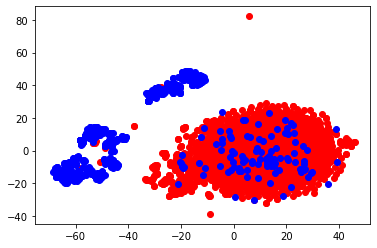

In [41]:
xi, yi = x_tnse[len(x_treat):].T
plt.scatter(xi, yi, c='r')
xi, yi = x_tnse[:len(x_treat)].T
plt.scatter(xi, yi, c='b')
plt.show()

In [45]:
x = featurize(train_features) #[::10]

In [46]:
tsne = TSNE()
x_tnse = tsne.fit_transform(x)

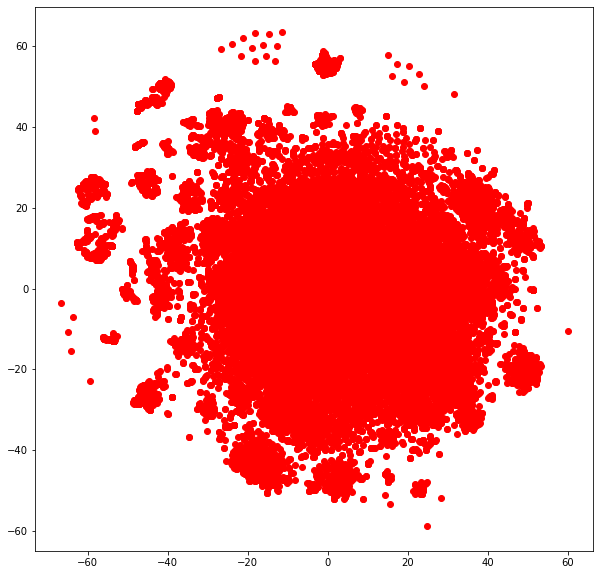

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
xi, yi = x_tnse.T
plt.scatter(xi, yi, c='r')
plt.show()

In [74]:
clustering = DBSCAN(eps=1)
classes = clustering.fit_predict(x_tnse)

In [66]:
clustering = GaussianMixture(10)
classes = clustering.fit_predict(x_tnse)

In [78]:
xi, yi = x_tnse.T
clusters = pd.DataFrame({'x' : xi, 'y' : yi, 'cluster' : classes})

In [82]:
xi, yi, classes = clusters[clusters['cluster'] > 1].values.T

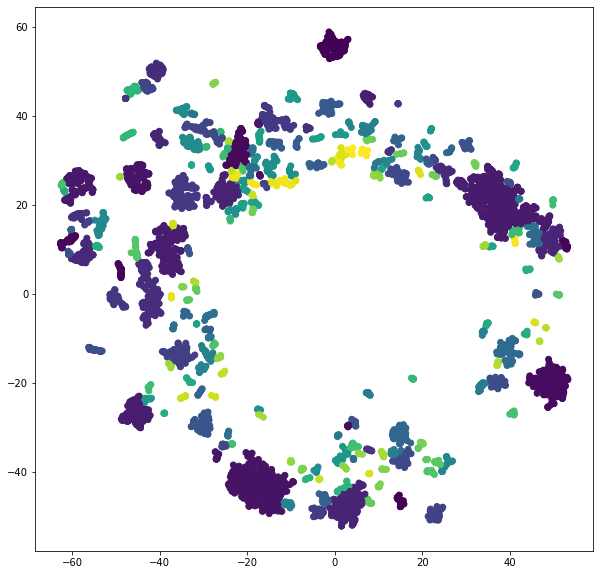

In [83]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(xi, yi, c=classes)
plt.show()

In [84]:
new_df = train_features[clusters['cluster'] > 1]

In [85]:
x = featurize(new_df) #[::10]
tsne = TSNE()
x_tnse = tsne.fit_transform(x)

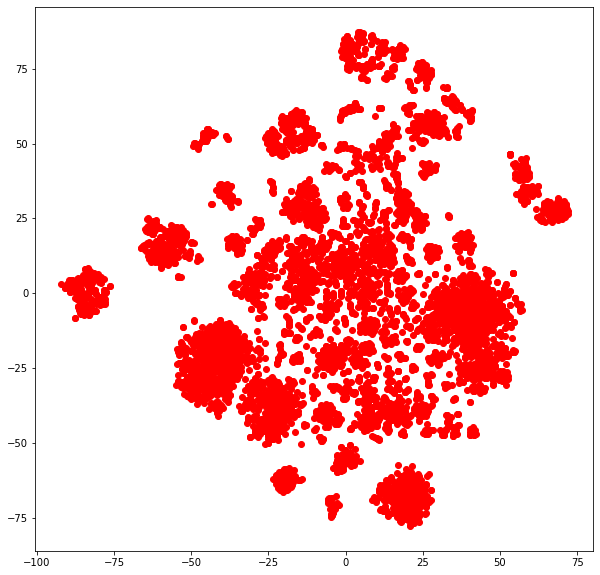

In [86]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
xi, yi = x_tnse.T
plt.scatter(xi, yi, c='r')
plt.show()